In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("D:/Engineering_codes/D12B_01_Sanjana Asrani/sem_5/DWM/Mall_Customers_dataset.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5
0,1,Male,19,15,39,NaN
1,2,Male,21,15,81,NaN
2,3,Female,20,16,6,NaN
3,4,Female,23,16,77,NaN
4,5,Female,31,17,40,NaN


In [3]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5
195,196,Female,35,120,79,NaN
196,197,Female,45,126,28,NaN
197,198,Male,32,126,74,NaN
198,199,Male,32,137,18,NaN
199,200,Male,30,137,83,NaN


In [4]:
df.shape
# tells the no. of rows & cols

(200, 6)

In [5]:
df=df.iloc[:,[3,4]].values
# srf annual income & spending score wala col liya
df

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

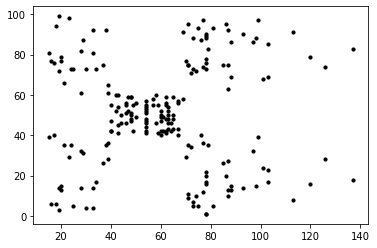

In [6]:
plt.scatter(df[:,0],df[:,1],s=10,c="black")
# [:,0] means all rows of index 1 col->annual income col
# s=10 means size of dots
# we can see below the number of clusters as 5

D:\anaconda_installation_by_sanj\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


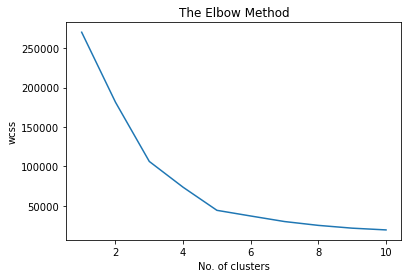

In [7]:
# finding optimal no of clusters using elbow method (kmeans) then performing the dbscan algo
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):  # 10 tak hi
        kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10 )
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

In [8]:
# hence it reads 5 as optimal no. of clusters
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5,min_samples=5)
labels=dbscan.fit_predict(df)
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

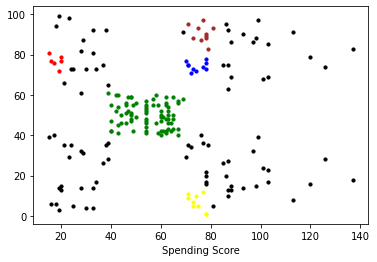

In [9]:
# noise is labelled by -1
# repeat the below line n times if no. of clusters is n
plt.scatter(df[labels==-1,0],df[labels==-1,1],s=10,c="black")  # noise in black color

plt.scatter(df[labels==0,0],df[labels==0,1],s=10,c="red")
plt.scatter(df[labels==1,0],df[labels==1,1],s=10,c="green")
plt.scatter(df[labels==2,0],df[labels==2,1],s=10,c="blue")
plt.scatter(df[labels==3,0],df[labels==3,1],s=10,c="yellow")
plt.scatter(df[labels==4,0],df[labels==4,1],s=10,c="brown")

plt.xlabel("Annual Income")
plt.xlabel("Spending Score")
plt.show()
